<a href="https://colab.research.google.com/github/sonalipatel01/sonalipatel01/blob/main/Copy_of___2_1_intro_to_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to pandas

Import the pandas library to be able to work with it in your notebook.

The community agreed on using the alias `pd` for pandas, so we will go with the convention.

In [2]:
import pandas as pd

# 1.&nbsp;DataFrames

Pandas handles rectangular data that is stored in tables. These tables are called DataFrames.

The tables store the data in horizontal rows and vertical columns.

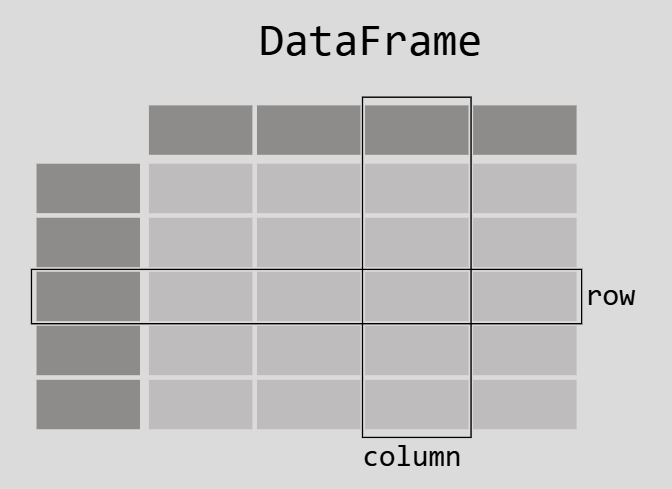

## 1.1&nbsp; Creating DataFrames

Let's create a DataFrame. This can be done in different ways, using

* a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp), or

* a [list](https://www.w3schools.com/python/python_lists.asp) of lists, or

* a list of dictionaries, etc.



Right now, we will create a DataFrame from a dictionary. (We will show you other ways later on.)
> Remember: a dictionary contains key-value pairs similar to this: `{key_1: value_1, key_2: value_2}`.

To create the DataFrame, we will follow these steps:

1. Create a dictionary. The keys will become the names of the columns. The values associated with the keys of the dictionary are lists, with as many elements as we want as rows in the DataFrame.

2. Convert that dictionary into a DataFrame using `pd.DataFrame()`.

Have a look at the `pd.DataFrame()` documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [30]:
# 1. Create a dictionary.
students = {
    "names": ["Erika", "Javi", "Maria", "Ana", "Shekhar", "Muriel", "Saira", "Alex", "Kit"],
    "ages": [22, 50, 23, 29, 44, 30, 25, 71, 35],
    "nationalities": ["DE", "ES", "ES", "PL", "IN", "FR", "IN", "PL", "UK"],
    "siblings": [2, 0, 4, 1, 1, 2, 3, 7, 0],
    "colours": ["Red", "Yellow", "Yellow", "Blue", "Red", "Yellow", "Blue", "Blue", "Red"]
    }

In [4]:
# 2. Convert the dictionary into a DataFrame.
students_df = pd.DataFrame(students)
students_df

,names,ages,nationalities,siblings,colours
0,Erika,22,DE,2,Red
1,Javi,50,ES,0,Yellow
2,Maria,23,ES,4,Yellow
3,Ana,29,PL,1,Blue
4,Shekhar,44,IN,1,Red
5,Muriel,30,FR,2,Yellow
6,Saira,25,IN,3,Blue
7,Alex,71,PL,7,Blue
8,Kit,35,UK,0,Red


> In the output above, we can see more than the columns we explicitly created! There is an additional column to the left of our columns. It contains numbers from 0, counting upwards. These numbers are integers by default and show the ordinal position of each row. As we start counting at 0, this will be the first row; 1 will denote the second row, etc.

This column is automatically added upon creating the DataFrame and called the **index**.

Have a look at the `index` documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).

# 2.&nbsp;Series

DataFrames consist of Series. Each column in a DataFrame is a Series.

Single columns of a DataFrame, i.e. Series can be accessed using this structure: `dataframe_name["column_label"]`.

In [5]:
# Show the Series with all the students' names.
students_df["names"]

0      Erika
1       Javi
2      Maria
3        Ana
4    Shekhar
5     Muriel
6      Saira
7       Alex
8        Kit
Name: names, dtype: object

> Note: A Series contains more than just the values of the column. It also contains the index we just saw for the DataFrame. The values in the Series are thus in the same order as in the DataFrame.

You will most certainly come across a second way to access an individual column of a DataFrame that follows this structure: `dataframe_name.column_label`.

While the result is the same, we recommend that you use `dataframe_name["column_label"]` for better readability.

#3.&nbsp;Accessing data

## 3.1&nbsp;Accessing columns

We already know how to access single columns.

In [6]:
# Show all values in the "nationalities" column and their indices.
students_df["nationalities"]

0    DE
1    ES
2    ES
3    PL
4    IN
5    FR
6    IN
7    PL
8    UK
Name: nationalities, dtype: object

Using *another* pair of square brackets allows you to select multiple columns.

In [7]:
# Show all values in the "nationalities" as well as in the "siblings" column and their indices.
students_df[["nationalities", "siblings"]]

,nationalities,siblings
0,DE,2
1,ES,0
2,ES,4
3,PL,1
4,IN,1
5,FR,2
6,IN,3
7,PL,7
8,UK,0


## 3.2&nbsp;Accessing rows

### 3.2.1&nbsp;`.head()`

`.head(n)` shows:
* the first `n` rows of the DataFrame. The default value is n = 5.

Have a look at the `.head()` documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html).

In [8]:
# Show top n = 3 rows.
students_df.head(3)

,names,ages,nationalities,siblings,colours
0,Erika,22,DE,2,Red
1,Javi,50,ES,0,Yellow
2,Maria,23,ES,4,Yellow


In [9]:
# Show default top 5 rows.
students_df.head()

,names,ages,nationalities,siblings,colours
0,Erika,22,DE,2,Red
1,Javi,50,ES,0,Yellow
2,Maria,23,ES,4,Yellow
3,Ana,29,PL,1,Blue
4,Shekhar,44,IN,1,Red


### 3.2.2&nbsp;`.tail()`

`.tail()` shows:
* the last `n` rows of the DataFrame. The default value is n = 5.

Have a look at the `.tail()` documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html).

In [10]:
# Show bottom n = 2 rows.
students_df.tail(2)

,names,ages,nationalities,siblings,colours
7,Alex,71,PL,7,Blue
8,Kit,35,UK,0,Red


In [11]:
# Show default bottom 5 rows.
students_df.tail()

,names,ages,nationalities,siblings,colours
4,Shekhar,44,IN,1,Red
5,Muriel,30,FR,2,Yellow
6,Saira,25,IN,3,Blue
7,Alex,71,PL,7,Blue
8,Kit,35,UK,0,Red


## 3.3&nbsp;Accessing groups of rows and columns

### 3.3.1&nbsp;`.loc[ ]`

You can use the row's index in combination with `.loc[]` to select the rows and the columns that you want.

`.loc[row_selection, column_selection]` takes as input information on both the rows and the columns to be returned. This information can be of the following form:
1. single row and/or column: specify row index and/or column label. Example: `.loc[5, column_label_2]`
2. multiple rows and/or columns: specify list with row indices and/or column labels. Example: `.loc[[5,7], [column_label_2, column_label_5]]`
3. slice of rows and/or columns: specify range of row indices and/or column labels. Example: `.loc[5:7, column_label_2:column_label_5]`
4. all rows and/or columns: use the format for slices, but do not specify any row indices and/or column labels. Example: `.loc[:,:]`

> Warning: contrary to the general convention, both start and end value of the slice are included in the results.

Of course, any combinations are possible too, such as:
- 1 row, multiple columns,
- 1 row, slice of columns,
- slice of rows, multiple columns,
- multiple rows, all columns,...

Have a look at the `.loc[ ]` documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html).

In [12]:
# Select single row, multiple columns.
students_df.loc[6, ["ages","colours"]]

ages         25
colours    Blue
Name: 6, dtype: object

In [13]:
# Select single row, slice of columns.
students_df.loc[1, "nationalities":"colours"]

nationalities        ES
siblings              0
colours          Yellow
Name: 1, dtype: object

In [14]:
# Select slice of rows, multiple columns.
students_df.loc[2:4, ["nationalities","colours"]]

,nationalities,colours
2,ES,Yellow
3,PL,Blue
4,IN,Red


In [15]:
# Select multiple rows, all columns.
students_df.loc[[1,3,6],:]

,names,ages,nationalities,siblings,colours
1,Javi,50,ES,0,Yellow
3,Ana,29,PL,1,Blue
6,Saira,25,IN,3,Blue


> While by default, the index consists of integers, starting from 0, this can be changed.

It is possible to set the index e.g. such that is corresponds to the values in one of the DataFrame's columns using `.set_index()`.

Have a look at the `.set_index()` documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html).

In [16]:
# Set the "names" column to be the index.
students_df_2 = students_df.set_index("names")
students_df_2

,ages,nationalities,siblings,colours
names,,,,
Erika,22,DE,2,Red
Javi,50,ES,0,Yellow
Maria,23,ES,4,Yellow
Ana,29,PL,1,Blue
Shekhar,44,IN,1,Red
Muriel,30,FR,2,Yellow
Saira,25,IN,3,Blue
Alex,71,PL,7,Blue
Kit,35,UK,0,Red


The `.loc[]` function can still be used by using the values from the index.

In [17]:
# Select single row, multiple columns.
students_df_2.loc["Saira", ["ages","colours"]]

ages         25
colours    Blue
Name: Saira, dtype: object

In [18]:
# Select single row, slice of columns.
students_df_2.loc["Javi", "nationalities":"colours"]

nationalities        ES
siblings              0
colours          Yellow
Name: Javi, dtype: object

In [19]:
# Select slice of rows, multiple columns.
students_df_2.loc["Muriel":"Kit", ["nationalities","colours"]]

,nationalities,colours
names,,
Muriel,FR,Yellow
Saira,IN,Blue
Alex,PL,Blue
Kit,UK,Red


In [20]:
# Select multiple rows, all columns.
students_df_2.loc[["Javi","Ana","Saira"],:]

,ages,nationalities,siblings,colours
names,,,,
Javi,50,ES,0,Yellow
Ana,29,PL,1,Blue
Saira,25,IN,3,Blue


### 3.3.2&nbsp;`.iloc[ ]`

There is another way to access groups of rows and columns without the need to specify the row index or the column label. `iloc[]` follows the same logic, but selects the rows and columns based on their position in the dataframe.

`.iloc[row_selection, column_selection]` takes as input information on both the rows and the columns to be returned. This information can be of the following form:
1. single row and/or column: specify row and/or column position. Example: `.iloc[5, 2]`
2. multiple rows and/or columns: specify list with row and/or column positions. Example: `.iloc[[5,7], [2,5]]`
3. slice of rows and/or columns: specify range of row and/or column positions. Example: `.iloc[5:7, 2:5]`
4. all rows and/or columns: use the format for slices, but do not specify any row indices and/or column labels. Example: `.iloc[:,:]`

> Here, the start value of the slice is included in the results, whereas the end value is not.

Of course, any combinations are possible too, such as:
- 1 row, multiple columns,
- 1 row, slice of columns,
- slice of rows, multiple columns
- multiple rows, all columns,...

Have a look at the `.loc[ ]` documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html).

In [43]:
# Select single row, multiple columns.
students_df_2.iloc[0, [1,3]]

nationalities     DE
colours          Red
Name: Erika, dtype: object

In [22]:
# Select single row, slice of columns.
students_df_2.iloc[1, 1:3]

nationalities    ES
siblings          0
Name: Javi, dtype: object

In [23]:
# Select slice of rows, multiple columns.
students_df_2.iloc[4:7, [0,2]]

,ages,siblings
names,,
Shekhar,44,1
Muriel,30,2
Saira,25,3


In [24]:
# Select multiple rows, all columns.
students_df_2.iloc[[0,2,4],:]

,ages,nationalities,siblings,colours
names,,,,
Erika,22,DE,2,Red
Maria,23,ES,4,Yellow
Shekhar,44,IN,1,Red


# 4.&nbsp;Manipulating data

## 4.1&nbsp;Rename column labels

Column labels can be changed using `.rename()`. You will need to pass in the names of the columns to be relabeled, as well as the new column label in the form of a dictionary.

Example: `.rename(columns={old_column_label: new_column_label})`

Have a look at the `.rename()` documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html).

In [28]:
# Rename the "nationalities" column to "country_codes".
# At the same time, rename the "names" column to "first_names".
students_df.rename(columns={"nationalities": "country_codes", "names": "first_names"})

,first_names,ages,country_codes,siblings,colours
0,Erika,22,DE,2,Red
1,Javi,50,ES,0,Yellow
2,Maria,23,ES,4,Yellow
3,Ana,29,PL,1,Blue
4,Shekhar,44,IN,1,Red
5,Muriel,30,FR,2,Yellow
6,Saira,25,IN,3,Blue
7,Alex,71,PL,7,Blue
8,Kit,35,UK,0,Red


## 4.2&nbsp;Drop duplicates

`.drop_duplicates()` will remove duplicates from the DataFrame. By default, it removes duplicate rows based on **all** columns.

To remove duplicates on specific column(s), use subset. This will by default keep the first occurrence.

Example: `.drop_duplicates(subset=[column_name])`

Have a look at the `.drop_duplicates()` documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html).

In [29]:
# Remove all duplicate colours.
students_df.drop_duplicates(subset=["colours"])

,names,ages,nationalities,siblings,colours
0,Erika,22,DE,2,Red
1,Javi,50,ES,0,Yellow
3,Ana,29,PL,1,Blue


# 5.&nbsp;Importing data

Most of the time, you will not be creating DataFrames yourself. Instead, you will usually import (or "read") data from a csv file into a DataFrame. For this, we will use pandas' read functions.

- **When working with Colab**: Store the csv on the google drive and then use the csv's url to access the data.
For other options, take a look at [this notebook](https://colab.research.google.com/notebooks/io.ipynb).

- **When working locally**: Store the csv locally and then use the relative or absolute path to access the data.
Example: `.read_csv("data/csv_to_read.csv")`

Have a look at the `.read_csv()` documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [ ]:
# Access a csv stored on a google drive that contains data on vehicles.
url = 'https://drive.google.com/file/d/18zYGrzRhn_mz1HJLXxSO_MwR0_nWBS3K/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
cars = pd.read_csv(path)

# 6.&nbsp;Challenges

## Exercise 1

From the DataFrame `students_df`, select the names and the colours columns.

In [46]:
students_df = pd.DataFrame(students)
students_df[["names","colours"]]
#students_df

,names,colours
0,Erika,Red
1,Javi,Yellow
2,Maria,Yellow
3,Ana,Blue
4,Shekhar,Red
5,Muriel,Yellow
6,Saira,Blue
7,Alex,Blue
8,Kit,Red


## Exercise 2

Show Saira's number of siblings.

In [71]:
students_df = pd.DataFrame(students)
students_df.iloc[6, [0,3]]


names       Saira
siblings        3
Name: 6, dtype: object

## Exercise 3

Show the different unique nationalities.

In [84]:
from numpy.lib.arraysetops import unique
students_df = pd.DataFrame(students)
df = students_df[("nationalities")].unique()
pd.DataFrame(df)

,0
0,DE
1,ES
2,PL
3,IN
4,FR
5,UK
